In [27]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [28]:
df=pd.read_csv("C:/Users/zkaus/OneDrive/Desktop/project for github/titanic/train.csv")
df_test=pd.read_csv("C:/Users/zkaus/OneDrive/Desktop/project for github/titanic/test.csv")


In [29]:

# preview the data
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [31]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket'], axis=1)
df_test=df_test.drop(['Name','Ticket'],axis=1)

C:\Users\zkaus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\zkaus\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


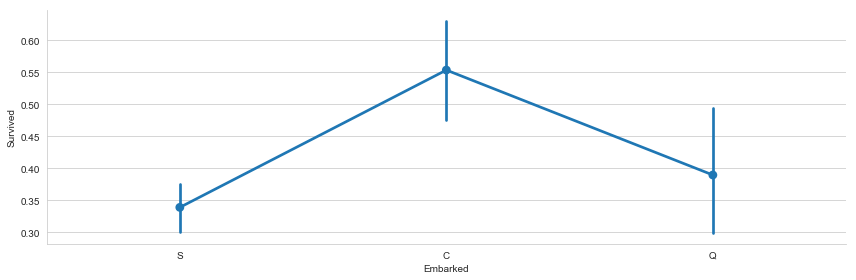

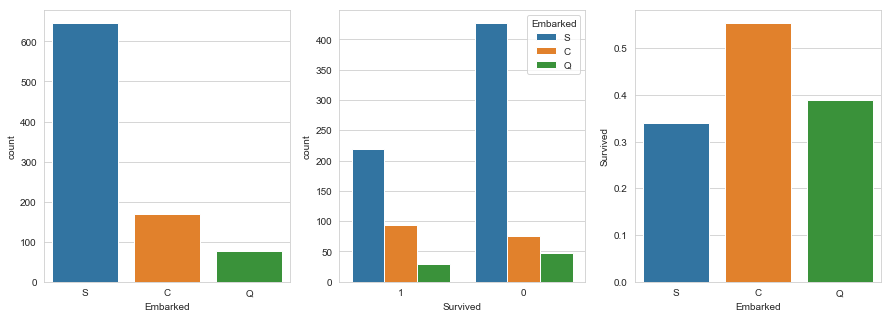

In [33]:
# Embarked

# only in df, fill the two missing values with the most occurred value, which is "S".
df["Embarked"] = df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(df_test['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

df = df.join(embark_dummies_titanic)
df_test    = df_test.join(embark_dummies_test)

df.drop(['Embarked'], axis=1,inplace=True)
df_test.drop(['Embarked'], axis=1,inplace=True)


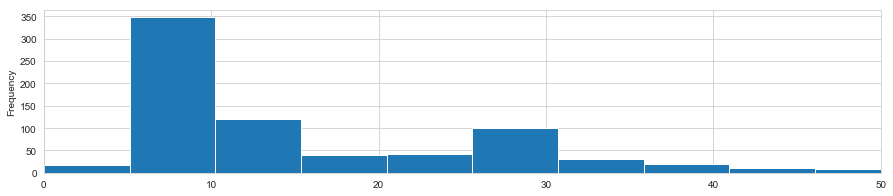

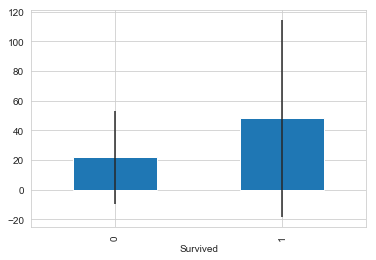

In [34]:
# Fare

# only for test_df, since there is a missing "Fare" values
df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)

# convert from float to int
df['Fare'] = df['Fare'].astype(int)
df_test['Fare']    = df_test['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = df["Fare"][df["Survived"] == 0]
fare_survived     = df["Fare"][df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

C:\Users\zkaus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zkaus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


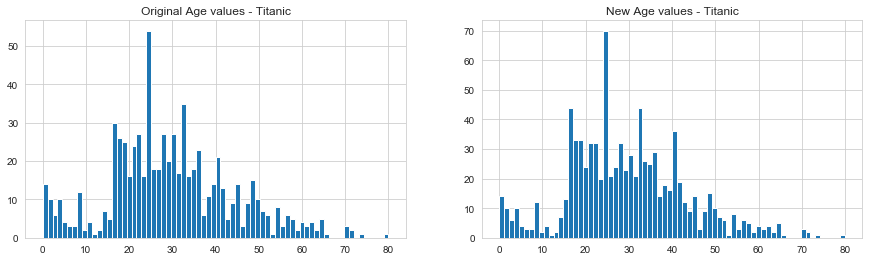

In [35]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in df
average_age_titanic   = df["Age"].mean()
std_age_titanic       = df["Age"].std()
count_nan_age_titanic = df["Age"].isnull().sum()

# get average, std, and number of NaN values in df_test
average_age_test   = df_test["Age"].mean()
std_age_test       = df_test["Age"].std()
count_nan_age_test = df_test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
df["Age"][np.isnan(df["Age"])] = rand_1
df_test["Age"][np.isnan(df_test["Age"])] = rand_2

# convert from float to int
df['Age'] = df['Age'].astype(int)
df_test['Age']    = df_test['Age'].astype(int)
        
# plot new Age Values
df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

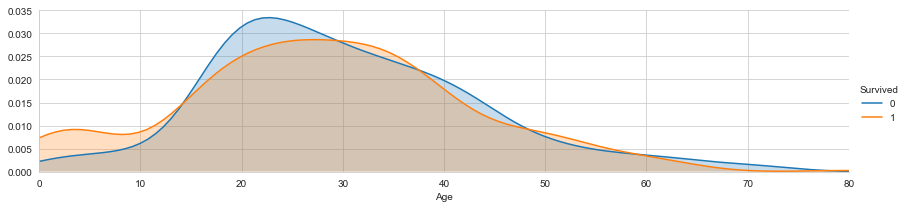

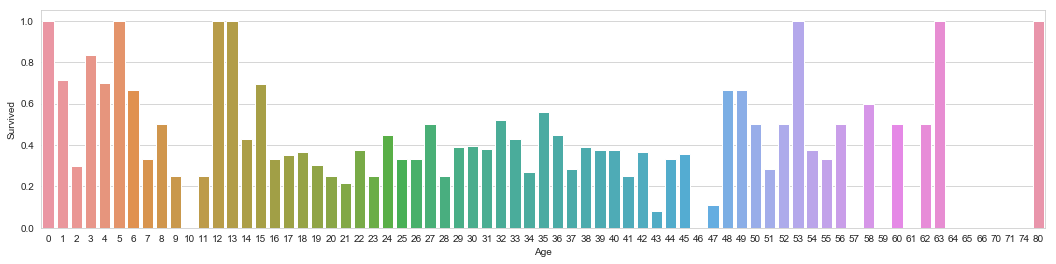

In [36]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [37]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
df.drop("Cabin",axis=1,inplace=True)
df_test.drop("Cabin",axis=1,inplace=True)

C:\Users\zkaus\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

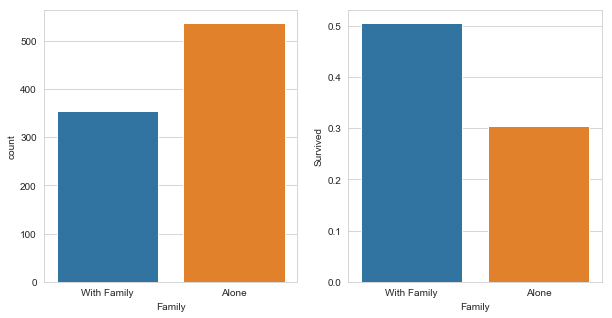

In [38]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
df['Family'] =  df["Parch"] + df["SibSp"]
df['Family'].loc[df['Family'] > 0] = 1
df['Family'].loc[df['Family'] == 0] = 0

df_test['Family'] =  df_test["Parch"] + df_test["SibSp"]
df_test['Family'].loc[df_test['Family'] > 0] = 1
df_test['Family'].loc[df_test['Family'] == 0] = 0

# drop Parch & SibSp
df = df.drop(['SibSp','Parch'], axis=1)
df_test    = df_test.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

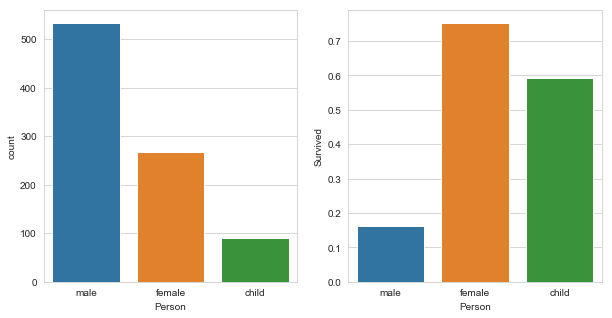

In [39]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
df['Person'] = df[['Age','Sex']].apply(get_person,axis=1)
df_test['Person']    = df_test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
df.drop(['Sex'],axis=1,inplace=True)
df_test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(df_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

df = df.join(person_dummies_titanic)
df_test=df_test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=df,kind='count',ax=axis1)
sns.countplot(x='Person', data=df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

df.drop(['Person'],axis=1,inplace=True)
df_test.drop(['Person'],axis=1,inplace=True)

C:\Users\zkaus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\zkaus\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


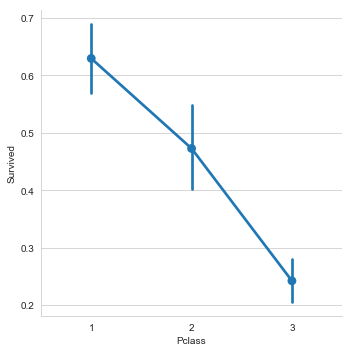

In [40]:
# Pclass

# sns.factorplot('Pclass',data=df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(df_test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

df.drop(['Pclass'],axis=1,inplace=True)
df_test.drop(['Pclass'],axis=1,inplace=True)

df = df.join(pclass_dummies_titanic)
df_test    = df_test.join(pclass_dummies_test)

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
# define training and testing sets

X_train = df.drop("Survived",axis=1)
Y_train = df["Survived"]
X_test  = df_test.drop("PassengerId",axis=1).copy()

In [43]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8069584736251403

In [44]:
# Support Vector Machines

# svc = SVC()

# svc.fit(X_train, Y_train)

# Y_pred = svc.predict(X_test)

# svc.score(X_train, Y_train)

In [45]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9674523007856342

In [46]:
# knn = KNeighborsClassifier(n_neighbors = 3)

# knn.fit(X_train, Y_train)

# Y_pred = knn.predict(X_test)

# knn.score(X_train, Y_train)

In [47]:
# Gaussian Naive Bayes

# gaussian = GaussianNB()

# gaussian.fit(X_train, Y_train)

# Y_pred = gaussian.predict(X_test)

# gaussian.score(X_train, Y_train)

In [48]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.022565
1,Fare,0.001037
2,C,0.602114
3,Q,0.292353
4,Family,-0.251151
5,Child,1.913674
6,Female,2.734927
7,Class_1,1.996451
8,Class_2,1.138637


In [49]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)